1000it [10:30,  1.59it/s]


[<rdkit.Chem.rdchem.Mol object at 0x146841540>, <rdkit.Chem.rdchem.Mol object at 0x146843b50>]


[15:19:15] Can't kekulize mol.  Unkekulized atoms: 13 14 15 16 18 31 32
[15:19:15] Can't kekulize mol.  Unkekulized atoms: 9 10 26
[15:19:15] Initializing MetalDisconnector
[15:19:15] Running MetalDisconnector
[15:19:15] Initializing Normalizer
[15:19:15] Running Normalizer
[15:19:15] Running LargestFragmentChooser
[15:19:15] Running Normalizer
[15:19:15] Running Uncharger
[15:19:15] Initializing MetalDisconnector
[15:19:15] Running MetalDisconnector
[15:19:15] Initializing Normalizer
[15:19:15] Running Normalizer
[15:19:15] Running LargestFragmentChooser
[15:19:15] Running Normalizer
[15:19:15] Running Uncharger


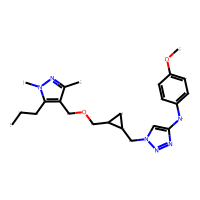

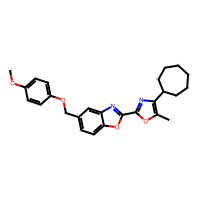

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Shape Tanimoto - 0.701576962632842


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Shape Tanimoto - 0.67916522341531


In [3]:
import py3Dmol

from ml_conformer_generator import MLConformerGenerator
from cheminformatics import evaluate_samples
from rdkit import Chem
from rdkit.Chem import rdDistGeom

from rdkit.Chem import Draw


device = "cpu"
generator = MLConformerGenerator(device=device)


ref_mol = Chem.MolFromMolFile("test_1.mol")
# rdDistGeom.EmbedMolecule(ref_mol, forceTol=0.001, randomSeed=12)

samples = generator.generate_conformers(reference_conformer=ref_mol, n_samples=4)
print(samples)

for sample in samples:
    smi = Chem.MolFromSmiles(Chem.MolToSmiles(sample))
    img = Draw.MolToImage(smi, size=(200, 200))
    display(img)
    
_, std_samples = evaluate_samples(ref_mol, samples)

view = py3Dmol.view(width=400, height=300, viewergrid=(2,2))

for sample in std_samples:
    view = py3Dmol.view(width=400, height=300)
    view.addModel(sample['mol_block'], 'mol')
    view.addModel(Chem.MolToMolBlock(ref_mol), 'mol')
    view.setStyle({'stick': {}})
    view.zoomTo()
    view.show()
    print(f"Shape Tanimoto - {sample['shape_tanimoto']}")